In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# 1. Dataset Selection

In [5]:
data = pd.read_csv(r"C:\Users\dhana\Downloads\house_prices.csv")

In [8]:
data.head()

,Size,Location,Number of Rooms,Price
0,1684,Suburban,4,328031
1,1812,Suburban,3,468946
2,3350,Rural,5,160976
3,2088,Suburban,6,74858
4,3291,Rural,5,180631


# 2. Tasks to Perform
1. Load and Explore
● Inspect the Dataset:

 Check for missing values and handle them appropriately

In [7]:
data.isnull()

,Size,Location,Number of Rooms,Price
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


Analyze distributions of numerical variables (e.g., Size, Price).

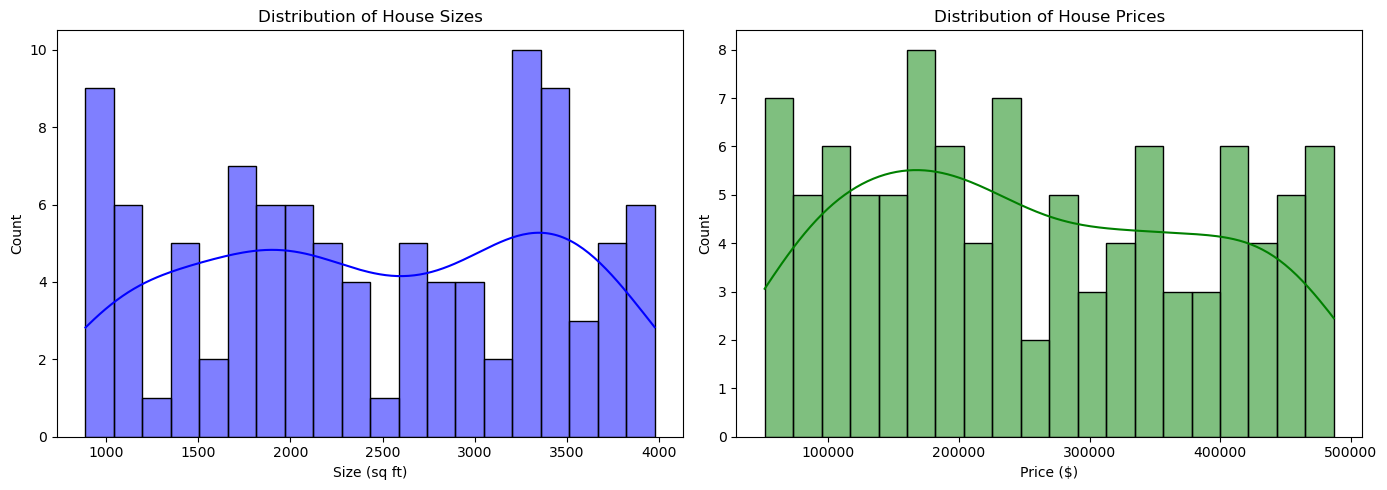

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data["Size"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of House Sizes")
axes[0].set_xlabel("Size (sq ft)")
axes[0].set_ylabel("Count")

sns.histplot(data["Price"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of House Prices")
axes[1].set_xlabel("Price ($)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

 Identify potential outliers that might skew results.

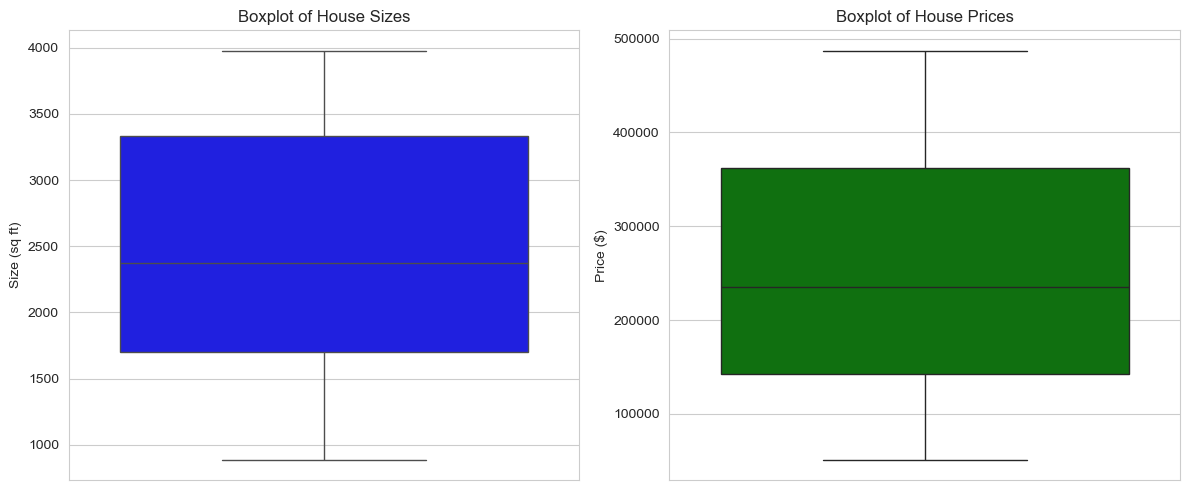

In [15]:
sns.set_style("whitegrid")

# Create subplots for boxplots to identify potential outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=data["Size"], ax=axes[0], color="blue")
axes[0].set_title("Boxplot of House Sizes")
axes[0].set_ylabel("Size (sq ft)")

sns.boxplot(y=data["Price"], ax=axes[1], color="green")
axes[1].set_title("Boxplot of House Prices")
axes[1].set_ylabel("Price ($)")

plt.tight_layout()
plt.show()

# 2. Data Preprocessing
● Normalize Numerical Data:

Scale features like Size and Number of Rooms to bring them to a comparable
range using methods like Min-Max Scaling or Standardization.



In [17]:

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

data["Size_MinMax"] = minmax_scaler.fit_transform(data[["Size"]])
data["Rooms_MinMax"] = minmax_scaler.fit_transform(data[["Number of Rooms"]])

data["Size_Standard"] = standard_scaler.fit_transform(data[["Size"]])
data["Rooms_Standard"] = standard_scaler.fit_transform(data[["Number of Rooms"]])

data.to_csv("scaled_house_prices.csv", index=False)

print(data[["Size", "Size_MinMax", "Size_Standard", "Number of Rooms", "Rooms_MinMax", "Rooms_Standard"]].head())

   Size  Size_MinMax  Size_Standard  Number of Rooms  Rooms_MinMax  \
0  1684     0.257772      -0.812371                4          0.50   
1  1812     0.299223      -0.676942                3          0.25   
2  3350     0.797280       0.950317                5          0.75   
3  2088     0.388601      -0.384924                6          1.00   
4  3291     0.778174       0.887893                5          0.75   

   Rooms_Standard  
0        0.080322  
1       -0.722897  
2        0.883541  
3        1.686761  
4        0.883541  


● Encode Categorical Features:


○ Convert Location into numerical values using methods such as:
■ One-Hot Encoding for non-ordinal categories.
■ Label Encoding for ordinal categories (if any).


In [19]:
# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

data["Size_MinMax"] = minmax_scaler.fit_transform(data[["Size"]])
data["Rooms_MinMax"] = minmax_scaler.fit_transform(data[["Number of Rooms"]])

# Apply Standardization (Z-score normalization)
data["Size_Standard"] = standard_scaler.fit_transform(data[["Size"]])
data["Rooms_Standard"] = standard_scaler.fit_transform(data[["Number of Rooms"]])

# Convert Location into numerical values using One-Hot Encoding
data = pd.get_dummies(data, columns=["Location"], drop_first=True)

# Save the transformed dataset to a new CSV file
data.to_csv("scaled_house_prices.csv", index=False)

# Display first few rows
print(data.head())


   Size  Number of Rooms   Price  Size_MinMax  Rooms_MinMax  Size_Standard  \
0  1684                4  328031     0.257772          0.50      -0.812371   
1  1812                3  468946     0.299223          0.25      -0.676942   
2  3350                5  160976     0.797280          0.75       0.950317   
3  2088                6   74858     0.388601          1.00      -0.384924   
4  3291                5  180631     0.778174          0.75       0.887893   

   Rooms_Standard  Location_Suburban  Location_Urban  
0        0.080322               True           False  
1       -0.722897               True           False  
2        0.883541              False           False  
3        1.686761               True           False  
4        0.883541              False           False  


# 3. Feature Selection

# ● Analyze Predictors:
○ Use correlation analysis to identify relationships between features and the target
variable (Price).     
○ Consider removing low-impact predictors to improve model performance.


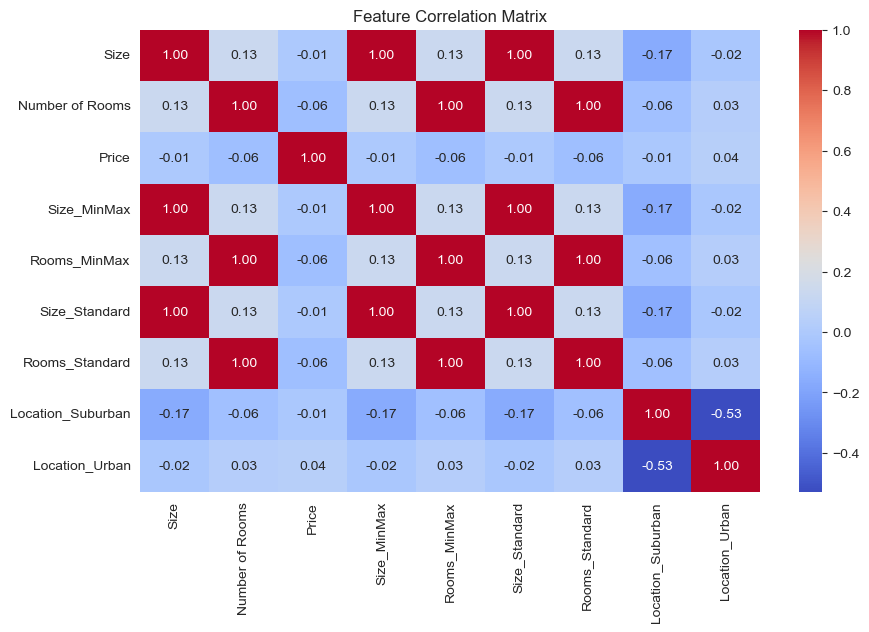

In [21]:
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [24]:
correlation_with_price = correlation_matrix["Price"].abs().sort_values(ascending=False)

threshold = 0.1
selected_features = correlation_with_price[correlation_with_price > threshold].index.tolist()

data_filtered = data[selected_features]

print("Selected Features:", selected_features)


Selected Features: ['Price']


# 4. Model Training
● Train-Test Split:
○ Divide the dataset into training and testing sets (e.g., 80% train, 20% test).
Ensure the split is random but reproducible.       
● Train a Linear Regression Model:              
○ Use libraries like scikit-learn or similar tools to fit the regression model.

In [25]:
X = data.drop(columns=["Price"])  # Assuming 'Price' is the target variable
y = data["Price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (80, 8)
Test set size: (20, 8)


In [26]:
from sklearn.linear_model import LinearRegression

# Initialize model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = lr_model.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 20039662165.61
R² Score: -0.15


# 5. Model Evaluation
● Evaluation Metrics:      
○ Calculate Root Mean Square Error (RMSE) to measure prediction accuracy.     
○ Determine R² (Coefficient of Determination) to evaluate how well the model           
explains variability in the data.

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Square Error (RMSE): 141561.51
R² Score: -0.15
